# Data Exploration (8 points):

Each item is worth 2 points.

For each question that asks to implement a function, implement it in the top cell where it is defined and then execute the function in the code cell provided below the question. <br>
You should base your answers on the output.<br>
You are allowed to implement and use additional functions. These would be defined and implemented in the
cell directly below the questions they were implemented for.

All the textual answers should be based on and justified with output from the data in the code cell above.<br>
For example, if the question asks about the correlation value, the code calculating it should appear above the answer, and the value should be in the output.
The answers should be concise and written in your own words.

### <span style="color:red">Do Not Modify the Structure of this Notebook, don't add/remove/move cells or change their type (Code/Markdown) </span>

1. [Implement the function `print_df_summary(df)`, then read the feather file 'TrainQuestionsDF.feather.zstd'<br> into a pandas dataframe and print its summary using the implemented function](#q1)
<br><br>
2. [We intend to predict the label for each sample, check if the data is balanced, or are there certain labels that are more common than others? <br>Justify you answer with an output from the data](#q2)
<br><br>
3. [Implement the functions `select_numeric_non_id_columns(df)` and `plot_pairwise_relationships(df)`, then generate a plot of the pairwise relationships between all the numerical columns in the dataset, excluding the id columns. <br>Which are the two most correlated columns, and what is the Pearson correlation coefficient between them?](#q3)
<br><br>
4. [Implement the function `plot_central_tendency_per_label(df, column)`, then select one of the numerical columns and generate the plot for it. What can you conclude from it?](#q4)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# TODO: Any additional (if needed) import statements should be in this cell


In [3]:
# TODO: Set the random seed as your student id (only numbers)
RANDOM_SEED = 3933758
np.random.seed(RANDOM_SEED)

In [4]:
# This cell is for functions given to you to use

def read_feather_to_df(feather_file_name):
    """
    The function expects to receive a path to feather file,
    it will read the file from the disk into a pandas dataframe
    :param feather_file_name: a string or path like object
    :return: pd.DataFrame
    """
    return pd.read_feather(feather_file_name)

In [5]:
# This cell is for all the functions you are expected to implement.
# You should implement them here and only call them below when they are mentioned in a question.

def print_df_summary(df):
    """
    This function will print a short summary of a df in the following format:
        Number of samples (rows): <number>
        Number of features (columns): <number>
        The column names and dtypes: <column names> <column dtype>
    :param df: pd.DataFrame
    """
    data_df= print("Number of samples (rows):"),print(df.shape[0])
    print("Number of features (columns):"), print(df.shape[1])
    print("The column names and dtypes:"), print(df.dtypes)
                
    return data_df


def select_numeric_non_id_columns(df):
    """
    Return a subset of a DataFrame’s columns based on the column dtypes,
    including only numerical columns and excluding columns with the string id (case-insensitive) in their name
    :param df: pd.DataFrame
    :return: pd.DataFrame
    """
    # TODO: write your code here
    df = df.select_dtypes(include=['Int64'])
    df = df.loc[:, ~df.columns.str.contains("Id")]
    return df


def plot_pairwise_relationships(df):
    """
    Plot pairwise relationships between all numerical columns
    :param df: pd.DataFrame
    """
    # TODO: write your code here
    sns.pairplot(df)
    plt.show()
    return


def plot_central_tendency_per_label(df, column):
    """
    Plot point estimates for the given column of the mean, per label.
    On the y-axis the values of the given column, and on the x-axis all the labels.
    The plot can be a point plot, bar plot, or similar.
    The labels on the x-axis should be in decreasing order of their point estimates,
    and all labels are on the plot are readable (e.g. not overlapping or too small)
    :param df: pd.DataFrame
    :param column: string, a name of a column in the df
    """
    # TODO: write your code here
    plot_order = df.groupby(["Label"])[column].mean().reset_index().sort_values(column, ascending=False)
    sns.barplot(data=df, x="Label", y=column, dodge='true', order=plot_order['Label'])  
    plt.xticks(rotation='vertical')
    plt.show()
    return

### <a name="q1"></a> 1. Implement the function `print_df_summary(df)`, then read the feather file 'TrainQuestionsDF.feather.zstd' into a pandas dataframe and print its summary using the implemented function

In [6]:
# TODO: write your function calls and code here
df = read_feather_to_df('TrainQuestionsDF.feather.zstd')
print_df_summary(df)

# You are expected to replace "pass" with your code and function calls for example:
# data_df = read_feather_to_df(TrainQuestionsDF.feather.zstd)
# print_df_summary(data_df)

Number of samples (rows):
21011
Number of features (columns):
21
The column names and dtypes:
Id                                Int64
PostTypeId                        Int64
AcceptedAnswerId                  Int64
CreationDate             datetime64[ns]
Score                             Int64
ViewCount                         Int64
Body                             string
OwnerUserId                       Int64
LastActivityDate         datetime64[ns]
Title                            string
AnswerCount                       Int64
CommentCount                      Int64
FavoriteCount                     Int64
LastEditorDisplayName            string
LastEditDate             datetime64[ns]
LastEditorUserId                  Int64
CommunityOwnedDate       datetime64[ns]
ParentId                          Int64
ClosedDate               datetime64[ns]
OwnerDisplayName                 string
Label                            object
dtype: object


(None, None)

### <a name="q2"></a> 2. We intend to predict the label for each sample, check if the data is balanced, or are there certain labels that are more common than others? <br>Justify you answer with an output from the data

In [7]:
# TODO: write your function calls and code here
df.groupby(['Label']).size()

Label
bayesian              3002
distributions         3002
hypothesis-testing    3002
logistic              3001
probability           3002
self-study            3001
time-series           3001
dtype: int64

*The data is as balanced as possible given the number of rows (21011/7=3001.57)*

### <a name="q3"></a> 3. Implement the functions `select_numeric_non_id_columns(df)` and `plot_pairwise_relationships(df)`, then generate a plot of the pairwise relationships between all the numerical columns in the dataset, excluding the id columns. <br>3.1 Which are the two most correlated columns? <br>3.2 What is the Pearson correlation coefficient between them?

,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount
0,42,3654,5,1,29
1,21,35577,5,2,11
2,336,198377,16,1,247
3,14,3371,2,0,4
4,5,233,1,0,1
...,...,...,...,...,...
21006,1,16,0,1,-1
21007,0,18,1,0,-1
21008,0,7,0,0,-1
21009,0,5,0,0,-1


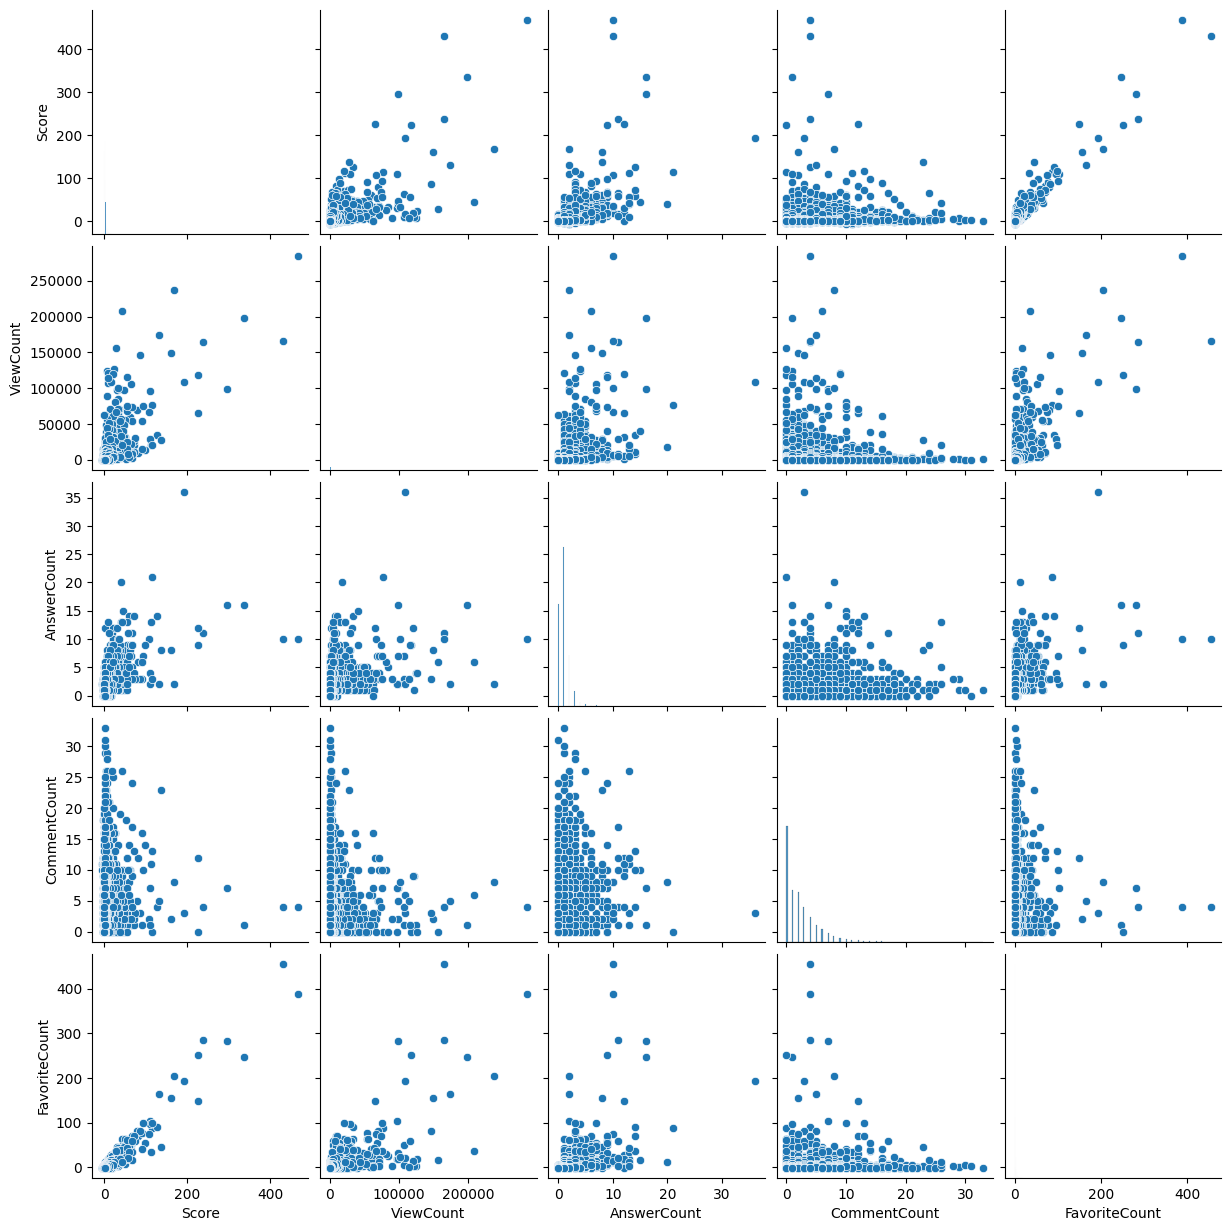

                  Score  ViewCount  AnswerCount  CommentCount  FavoriteCount
Score          1.000000   0.687196     0.488287      0.098718       0.935385
ViewCount      0.687196   1.000000     0.379013      0.052474       0.705935
AnswerCount    0.488287   0.379013     1.000000      0.072248       0.404839
CommentCount   0.098718   0.052474     0.072248      1.000000       0.066562
FavoriteCount  0.935385   0.705935     0.404839      0.066562       1.000000


In [8]:
# TODO: write your function calls and code here
df_filt = select_numeric_non_id_columns(df)
display(df_filt)
plot_pairwise_relationships(df_filt)
print(df_filt.corr())

Score and FavoriteCount are the two most correlated columns. The pearsons coefficient for them is 0.935385.

### <a name="q4"></a> 4. Implement the function `plot_central_tendency_per_label(df, column)`, then select one of the numerical columns and generate the plot for it. <br>What can you conclude from it?

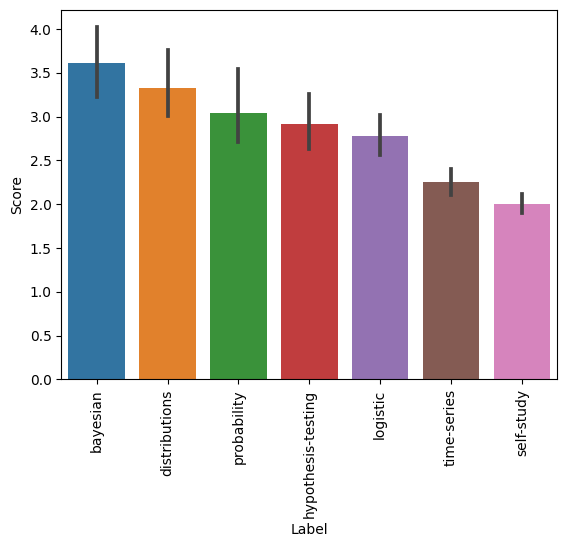

In [9]:
# TODO: write your function calls and code here
plot_central_tendency_per_label(df, "Score")

*Posts with a Bayesian label had the highest mean score. Posts with labelled as self-study had the lowest mean score.*